In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt# Load Iris dataset
iris = datasets.load_iris()

In [2]:
# Preparing Iris dataset
iris_data = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [3]:
iris_target = pd.DataFrame(data=iris.target, columns=['species'])
iris_df = pd.concat([iris_data, iris_target], axis=1)

In [4]:
# Add species name
iris_df['species_name'] = np.where(iris_df['species'] == 0, 'Setosa', None)
iris_df['species_name'] = np.where(iris_df['species'] == 1, 'Versicolor', iris_df['species_name'])
iris_df['species_name'] = np.where(iris_df['species'] == 2, 'Virginica', iris_df['species_name'])

In [5]:
# Prepare petal length by species datasets
setosa_petal_length = iris_df[iris_df['species_name'] == 'Setosa']['petal_length']

In [6]:
versicolor_petal_length = iris_df[iris_df['species_name'] == 'Versicolor']['petal_length']
virginica_petal_length = iris_df[iris_df['species_name'] == 'Virginica']['petal_length']

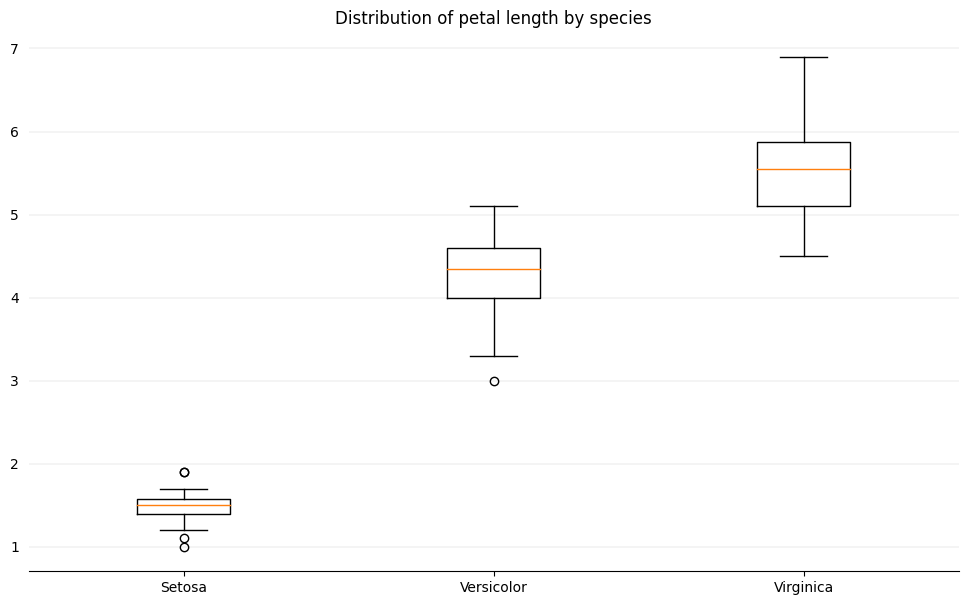

In [7]:
# Visualize petal length distribution for all species
fig, ax = plt.subplots(figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title('Distribution of petal length by species')

# Set species names as labels for the boxplot
dataset = [setosa_petal_length, versicolor_petal_length, virginica_petal_length]

labels = iris_df['species_name'].unique()
ax.boxplot(dataset, labels=labels)
plt.show()

In [10]:
def get_summary_statistics(dataset):

    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    print('Setosa summary statistics')
    print('\n\nSetosa summary statistics')



In [9]:
print('\n\nSetosa summary statistics')
get_summary_statistics(setosa_petal_length)



Setosa summary statistics
Min: 1.0
Mean: 1.46
Max: 1.9
25th percentile: 1.4
Median: 1.5
75th percentile: 1.58
Interquartile range (IQR): 0.18
Setosa summary statistics


Setosa summary statistics


In [11]:
print('\n\nVersicolor summary statistics')
get_summary_statistics(versicolor_petal_length)



Versicolor summary statistics
Min: 3.0
Mean: 4.26
Max: 5.1
25th percentile: 4.0
Median: 4.35
75th percentile: 4.6
Interquartile range (IQR): 0.6
Setosa summary statistics


Setosa summary statistics


In [12]:
print('\n\nVirginica summary statistics')
get_summary_statistics(virginica_petal_length)



Virginica summary statistics
Min: 4.5
Mean: 5.55
Max: 6.9
25th percentile: 5.1
Median: 5.55
75th percentile: 5.88
Interquartile range (IQR): 0.78
Setosa summary statistics


Setosa summary statistics


In [13]:
#1 sample t-tests
import numpy as np
from scipy import stats

# Population Mean
mu = 10

# Sample Size
N1 = 21

# Degrees of freedom
dof = N1 - 1

# Generate a random sample with mean = 11 and standard deviation = 1
x = np.random.randn(N1) + 11

# Using the Stats library, compute t-statistic and p-value
t_stat, p_val = stats.ttest_1samp(a=x, popmean = mu)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 3.749415452557537
p-value = 0.0012630848207269823


In [14]:
#2 sample t-test
# Sample Sizes
N1, N2 = 21, 25

# Degrees of freedom
dof = min(N1,N2) - 1

# Gaussian distributed data with mean = 10.5 and var = 1
x = np.random.randn(N1) + 10.5

# Gaussian distributed data with mean = 9.5 and var = 1
y = np.random.randn(N2) + 9.5

## Using the internal function from SciPy Package
t_stat, p_val = stats.ttest_ind(x, y)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 5.059833846213494
p-value = 7.910961412976002e-06


In [15]:
#welch's t-test
# Sample Sizes
N1, N2 = 21, 25

# Degrees of freedom
dof = min(N1,N2) - 1

# Gaussian distributed data with mean = 9.9 and var = 1
x = np.random.randn(N1) + 9.9

# Gaussian distributed data with mean = 10 and var = 3
y = 3*np.random.randn(N2) + 10

## Using SciPy Package
t_stat, p_val = stats.ttest_ind(x, y, equal_var = False)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = -0.04505461719351464
p-value = 0.9643714374552262
